<h2>Koronan seuranta</h2>

Ajamalla koodit saat tuoreimman tilanteen.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

# Mahdollisten varoitusten piilotus
warnings.filterwarnings('ignore')

# Grafiikan tyyliasetus
plt.style.use('ggplot')

# Ajantasaisen datan nouto ecdc:n sivuilta
df = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx')

# Päivämäärät indeksiin
df.index = pd.to_datetime(df['dateRep'], format='%d/%m/%Y')
df = df.drop('dateRep', axis=1).sort_index()

df.head()

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Vietnam,VN,VNM,9.646211e+07,Asia,NaN
2019-12-31,31,12,2019,0,0,Iceland,IS,ISL,3.569910e+05,Europe,NaN
2019-12-31,31,12,2019,0,0,Afghanistan,AF,AFG,3.804176e+07,Asia,NaN
2019-12-31,31,12,2019,0,0,Israel,IL,ISR,8.519373e+06,Asia,NaN
2019-12-31,31,12,2019,0,0,India,IN,IND,1.366418e+09,Asia,NaN


In [2]:
# Funktio noutaa datasta maan tiedot (tartunnat, kuolleet, asukasluku) 
# ja esittää 7 päivän liukuvat keskiarvot viivakaaviona
def liukuva7(maa):
    df_maa = df[df['countriesAndTerritories'] == maa][['cases', 'deaths', 'popData2019']]
    df_maa = df_maa['2020-03':]
    fig, ax1 = plt.subplots(figsize = (14, 6))
    ax1.set_ylabel('tartunnat - 7 päivän liukuva', color='C0', fontsize=14)
    ax1.plot(df_maa['cases'].rolling(7).mean(), color='C0')
    ax2 = ax1.twinx()
    ax2.set_ylabel('kuolemat - 7 päivän liukuva', color='C1', fontsize=14)
    ax2.plot(df_maa['deaths'].rolling(7).mean(), color='C1')
    asukasluku = df_maa['popData2019'][0].astype(int).astype(str)
    ax1.set_title(maa + ' (asukasluku 2019: ' + asukasluku + ')')
    
# Kahden maan vertailu, tartuntojen 7 päivän liukuva keskiarvo
# Kummallakin maalla oma arvoakseli
def vrt1(maa1, maa2):
    df_maa1 = df[df['countriesAndTerritories'] == maa1]
    df_maa2 = df[df['countriesAndTerritories'] == maa2]
    asukasluku1 = df_maa1['popData2019'][0].astype(int).astype(str)
    asukasluku2 = df_maa2['popData2019'][0].astype(int).astype(str)
    fig, ax1 = plt.subplots(figsize = (14, 6))
    ax1.set_ylabel(maa1 + ' tartunnat - 7 päivän liukuva', color='C0', fontsize=14)
    ax1.plot(df_maa1['cases'].rolling(7).mean(), color='C0')
    ax2 = ax1.twinx()
    ax2.set_ylabel(maa2 + ' tartunnat - 7 päivän liukuva', color='C1', fontsize=14)
    ax2.plot(df_maa2['cases'].rolling(7).mean(), color='C1')
    ax1.set_title(maa1 + ' (' + asukasluku1 + ') & ' + 
                  maa2 + ' (' + asukasluku2 + ')')
# Kahden maan vertailu, tartuntojen ilmaantuvuus sataa tuhatta asukasta kohden
# kahdessa viikossa
def vrt2(maa1, maa2):
    df_maa1 = df[df['countriesAndTerritories'] == maa1]
    df_maa2 = df[df['countriesAndTerritories'] == maa2]
    df_maa1['casesp'] = df_maa1['cases']/(df_maa1['popData2019']/100000)
    df_maa2['casesp'] = df_maa2['cases']/(df_maa2['popData2019']/100000)
    fig, ax = plt.subplots(figsize = (14, 6))
    ax.plot(df_maa1['casesp'].rolling(14).sum(), color='C0', label=maa1)
    ax.plot(df_maa2['casesp'].rolling(14).sum(), color='C1', label=maa2) 
    ax.set_ylabel('Ilmaantuvuus 14 pv / 100000')
    ax.set_title(maa1 + ' & ' +  maa2)
    ax.legend()

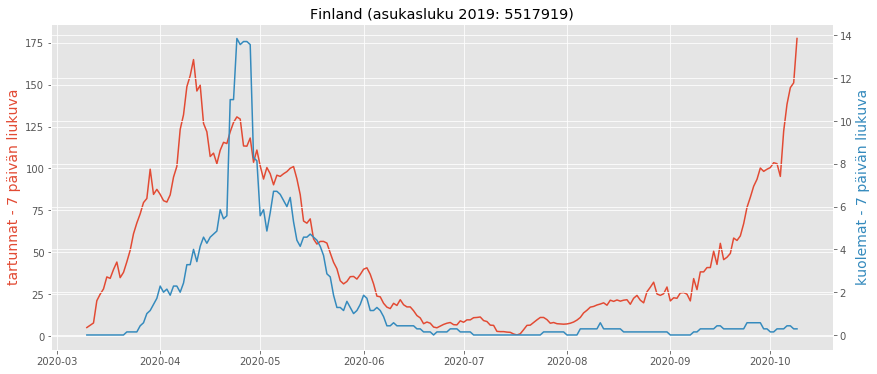

In [3]:
liukuva7('Finland')

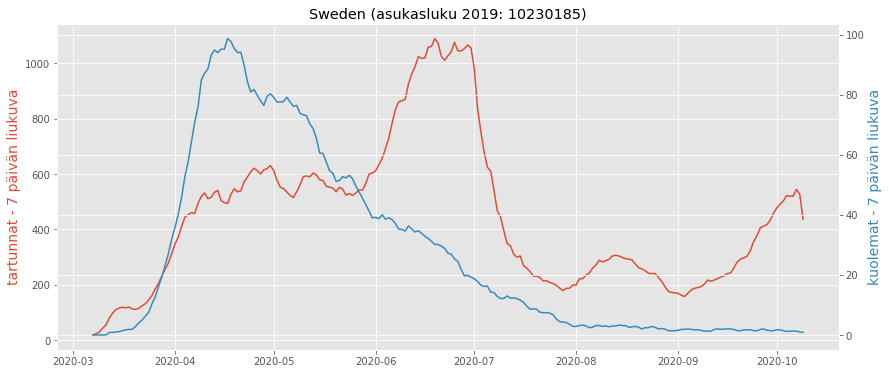

In [4]:
liukuva7('Sweden')

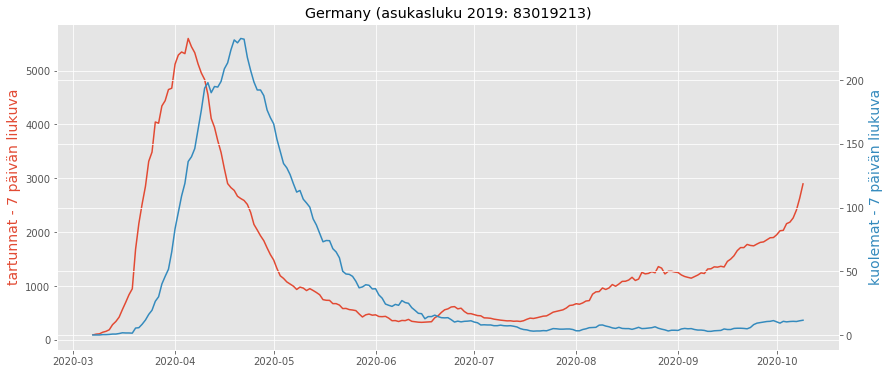

In [5]:
liukuva7('Germany')

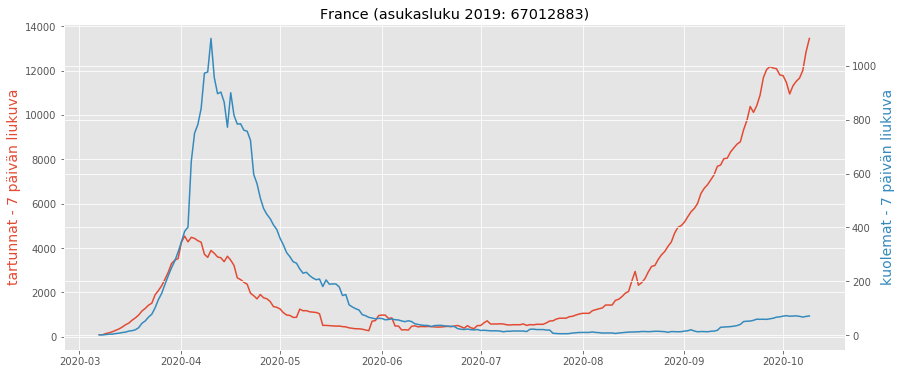

In [6]:
liukuva7('France')

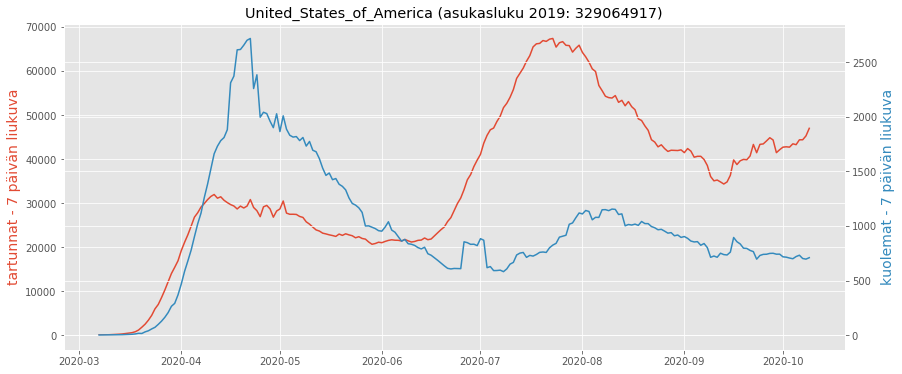

In [7]:
liukuva7('United_States_of_America')

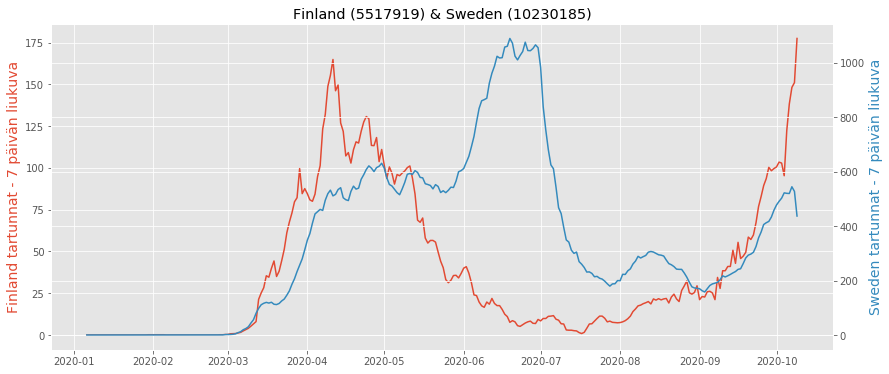

In [8]:
vrt1('Finland', 'Sweden')

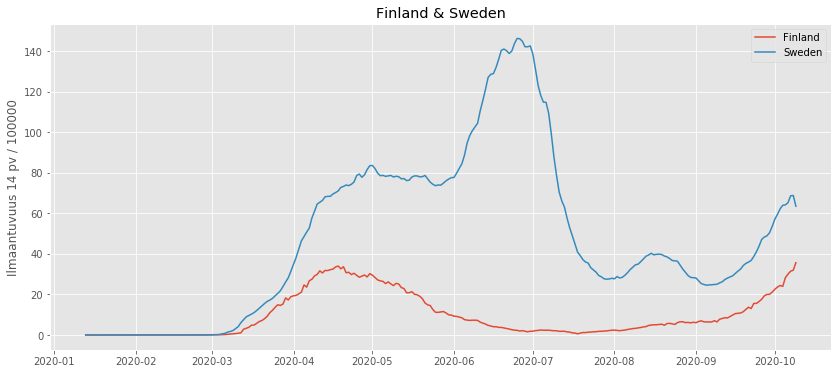

In [9]:
vrt2('Finland', 'Sweden')

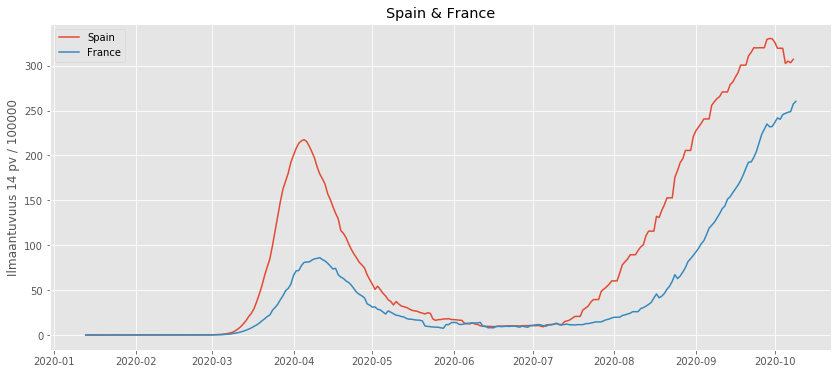

In [10]:
vrt2('Spain', 'France')

In [11]:
# Jos haluat katsoa jonkun muun maan tietoja, 
# niin kirjoita maan nimi oikein:
list(np.sort(pd.unique(df['countriesAndTerritories'])))

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua_and_Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire, Saint Eustatius and Saba',
 'Bosnia_and_Herzegovina',
 'Botswana',
 'Brazil',
 'British_Virgin_Islands',
 'Brunei_Darussalam',
 'Bulgaria',
 'Burkina_Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape_Verde',
 'Cases_on_an_international_conveyance_Japan',
 'Cayman_Islands',
 'Central_African_Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa_Rica',
 'Cote_dIvoire',
 'Croatia',
 'Cuba',
 'CuraÃ§ao',
 'Cyprus',
 'Czechia',
 'Democratic_Republic_of_the_Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican_Republic',
 'Ecuador',
 'Egypt',
 'El_Salvador',
 'Equatorial_Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'F